In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM


filename = 'Desktop\AAPL (3).csv'

df = pd.read_csv(filename)

df.sort_values('Date')

df.tail(10)



,Date,Open,High,Low,Close,Adj Close,Volume
4517,2018-08-31,226.509995,228.869995,226.000000,227.630005,227.630005,43340100
4518,2018-09-04,228.410004,229.179993,226.630005,228.360001,228.360001,27390100
4519,2018-09-05,228.990005,229.669998,225.100006,226.869995,226.869995,33333000
4520,2018-09-06,226.229996,227.350006,221.300003,223.100006,223.100006,34290000
4521,2018-09-07,221.850006,225.369995,220.710007,221.300003,221.300003,37619800
4522,2018-09-10,220.949997,221.850006,216.470001,218.330002,218.330002,39516500
4523,2018-09-11,218.009995,224.300003,216.559998,223.850006,223.850006,35749000
4524,2018-09-12,224.940002,225.000000,219.839996,221.070007,221.070007,49278700
4525,2018-09-13,223.520004,228.350006,222.570007,226.410004,226.410004,41706400
4526,2018-09-14,225.750000,226.839996,222.520004,223.839996,223.839996,31902700


In [23]:
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
open_prices = df.loc[:,'Open'].as_matrix()
close_prices = df.loc[:,'Close'].as_matrix()
OHLC_mean = (high_prices+low_prices+open_prices+close_prices)/4.0

print(OHLC_mean)

[  4.13783425   4.263393     4.29380375 ... 222.71250125 225.21250525
 224.737499  ]


C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [24]:
scaler = MinMaxScaler()
OHLC_mean_scaled = np.reshape(OHLC_mean, (len(OHLC_mean),1))
OHLC_mean_scaled = scaler.fit_transform(OHLC_mean_scaled)


train_values = 4400

train_data, test_data = OHLC_mean_scaled[0:train_values,:], OHLC_mean_scaled[train_values:len(OHLC_mean_scaled),:]

print(len(OHLC_mean_scaled))


4527


In [25]:
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
    data_X, data_Y = [], []
    for i in range(len(dataset)-step_size-1):
        a = dataset[i:(i+step_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + step_size, 0])
    return np.array(data_X), np.array(data_Y)


# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_data, 1)
testX, testY = new_dataset(test_data, 1)

print(len(testX))

125


In [26]:
# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

print(len(testX))

125


In [27]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adagrad') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=100, batch_size=60, verbose=1)


Epoch 1/100
4398/4398 [==============================] - 2s 490us/step - loss: 0.0204
Epoch 2/100
4398/4398 [==============================] - 1s 159us/step - loss: 5.7980e-04
Epoch 3/100
4398/4398 [==============================] - 1s 232us/step - loss: 2.4241e-04
Epoch 4/100
4398/4398 [==============================] - 1s 197us/step - loss: 2.1602e-04
Epoch 5/100
4398/4398 [==============================] - 1s 155us/step - loss: 1.9470e-04
Epoch 6/100
4398/4398 [==============================] - 1s 158us/step - loss: 1.7508e-04
Epoch 7/100
4398/4398 [==============================] - 1s 194us/step - loss: 1.5797e-04
Epoch 8/100
4398/4398 [==============================] - 1s 191us/step - loss: 1.4158e-04
Epoch 9/100
4398/4398 [==============================] - 1s 228us/step - loss: 1.2756e-04
Epoch 10/100
4398/4398 [==============================] - 1s 182us/step - loss: 1.1574e-04
Epoch 11/100
4398/4398 [==============================] - 1s 171us/step - loss: 1.0435e-04
Epoch 12/100

4398/4398 [==============================] - 1s 154us/step - loss: 1.6196e-05
Epoch 91/100
4398/4398 [==============================] - 1s 174us/step - loss: 1.6066e-05
Epoch 92/100
4398/4398 [==============================] - 1s 145us/step - loss: 1.6137e-05
Epoch 93/100
4398/4398 [==============================] - 1s 149us/step - loss: 1.6137e-05
Epoch 94/100
4398/4398 [==============================] - 1s 145us/step - loss: 1.6169e-05
Epoch 95/100
4398/4398 [==============================] - 1s 146us/step - loss: 1.6074e-05
Epoch 96/100
4398/4398 [==============================] - 1s 146us/step - loss: 1.6123e-05
Epoch 97/100
4398/4398 [==============================] - 1s 145us/step - loss: 1.6074e-05
Epoch 98/100
4398/4398 [==============================] - 1s 145us/step - loss: 1.6064e-05
Epoch 99/100
4398/4398 [==============================] - 1s 147us/step - loss: 1.6092e-05
Epoch 100/100
4398/4398 [==============================] - 1s 158us/step - loss: 1.6136e-05


In [28]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))


Train RMSE: 0.91
Test RMSE: 3.54


In [29]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_mean_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[:len(trainPredict), :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_mean_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+step_size*2+1:len(OHLC_mean_scaled)-1, :] = testPredict


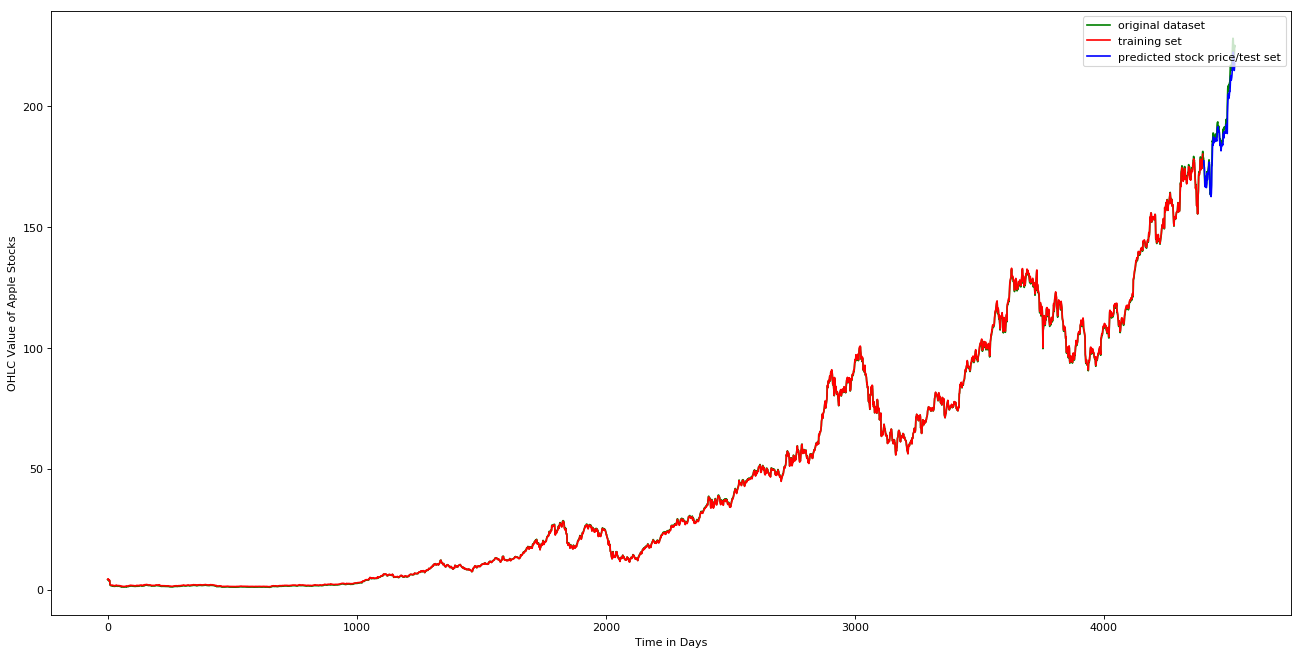

In [30]:
# DE-NORMALIZING MAIN DATASET 
OHLC_mean_denorm = scaler.inverse_transform(OHLC_mean_scaled)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(OHLC_mean_denorm, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Apple Stocks')
plt.show()


In [31]:
#FUTURE VALUES
    
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print ("Last Day Value:", np.asscalar(last_val))
print ("Next Day Value:", np.asscalar(last_val*next_val))
# print np.append(last_val, next_val)



Last Day Value: 217.7091064453125
Next Day Value: 212.24252319335938


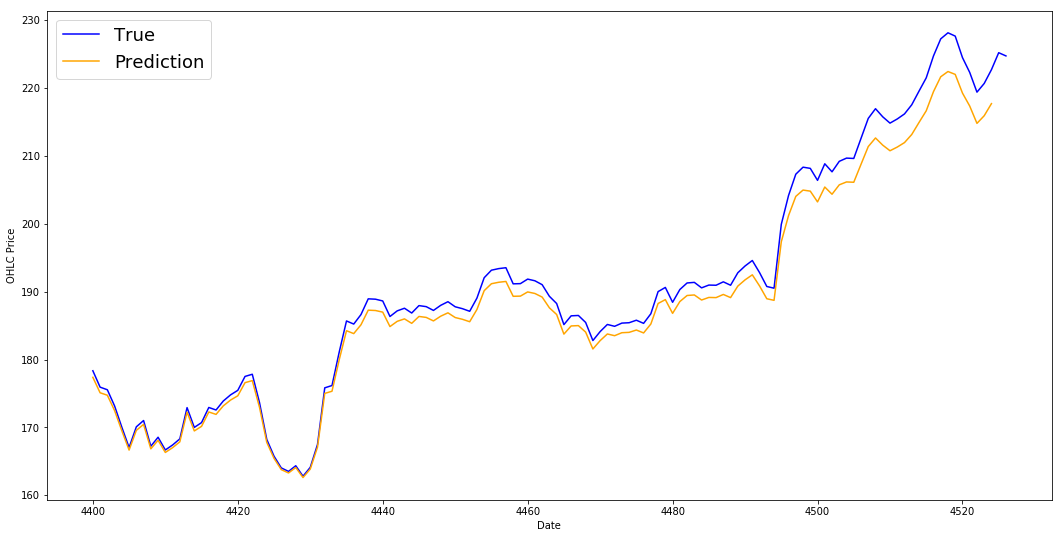

In [32]:


plt.figure(figsize = (18,9))
plt.plot(range(4400, df.shape[0]),OHLC_mean_denorm[4400:],color='b',label='True')
plt.plot(range(4400, df.shape[0]-2),testPredict,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('OHLC Price')
plt.legend(fontsize=18)
plt.show()

In [33]:
# PREDICT FUTURE VALUES(30 days)

future = []
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
future.append(np.asscalar(last_val*next_val))

for i in range (0,30):
    prev_day = future[-1]
    prev_day_scaled = prev_day/prev_day
    next_day = model.predict(np.reshape(prev_day_scaled, (1,1,1)))
    future.append(np.asscalar(prev_day*next_day))
    
print(future)

[212.24252319335938, 206.9132080078125, 201.7176971435547, 196.65264892578125, 191.71478271484375, 186.90090942382812, 182.20790100097656, 177.6327362060547, 173.17245483398438, 168.8241729736328, 164.58506774902344, 160.45240783691406, 156.4235076904297, 152.4957733154297, 148.6666717529297, 144.9337158203125, 141.29449462890625, 137.74664306640625, 134.2878875732422, 130.9159698486328, 127.62872314453125, 124.42401885986328, 121.2997817993164, 118.25399780273438, 115.2846908569336, 112.38993835449219, 109.56787109375, 106.81666564941406, 104.1345443725586, 101.51976776123047, 98.97064971923828]


No handles with labels found to put in legend.


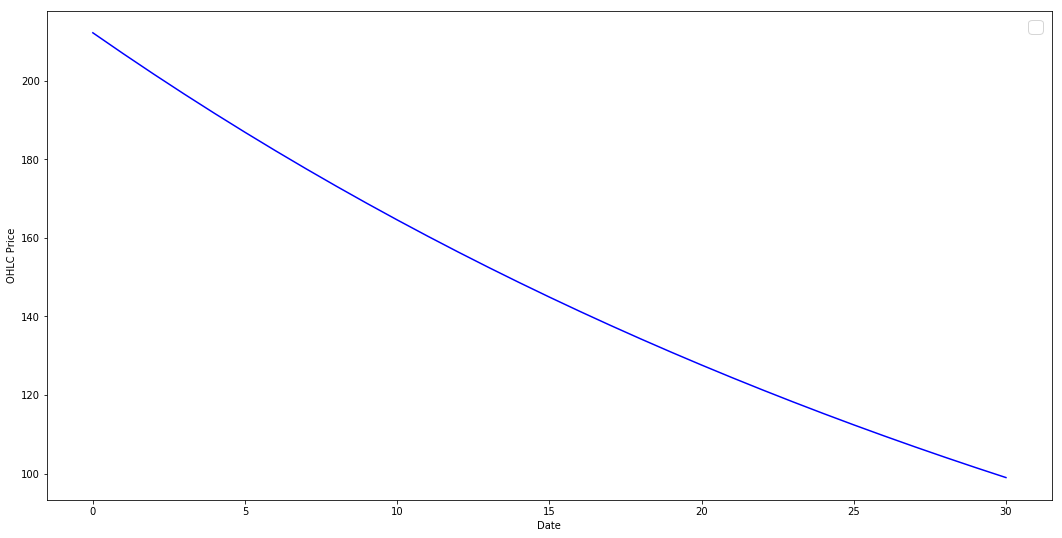

In [34]:
plt.figure(figsize = (18,9))
plt.plot(range(0, 31),future,color='b')

plt.xlabel('Date')
plt.ylabel('OHLC Price')
plt.legend(fontsize=18)
plt.show()

In [50]:
# LSTM MODEL
newmodel = Sequential()
newmodel.add(LSTM(32, input_shape=(None, 1), return_sequences = True, stateful = True, batch_input_shape=(1,None,1)))
newmodel.add(LSTM(16, stateful=True))
newmodel.add(Dense(1))
newmodel.add(Activation('linear'))
newmodel.set_weights(model.get_weights())

newmodel.reset_states()

testPredict.reshape(125,1,1)
futureElement = testPredict[-1]

futureElements = []
futureElements.append(futureElement)

for i in range(30):
    futureElement = newmodel.predict(futureElement)
    futureElements.append(futureElement)
    
print(futureElements)

IndexError: too many indices for array